In [3]:
import numpy as np
import pyslsa
import matplotlib.pyplot as plt
%matplotlib inline
import neuraltda.topology2 as tp2
import neuraltda.simpComp as sc
import neuraltda.spectralAnalysis as sa
import neuraltda.pyslsa_environments as pse
import pandas as pd
import h5py as h5

In [9]:
import pickle
from neuraltda.pyslsa_environments import TPEnv

# Load the results of PySLSA_EnvironmentTest.py
with open('/home/brad/environment_out22.pkl', 'rb') as f:
    (dists, spikes, fields, envs, corrmat) = pickle.load(f)

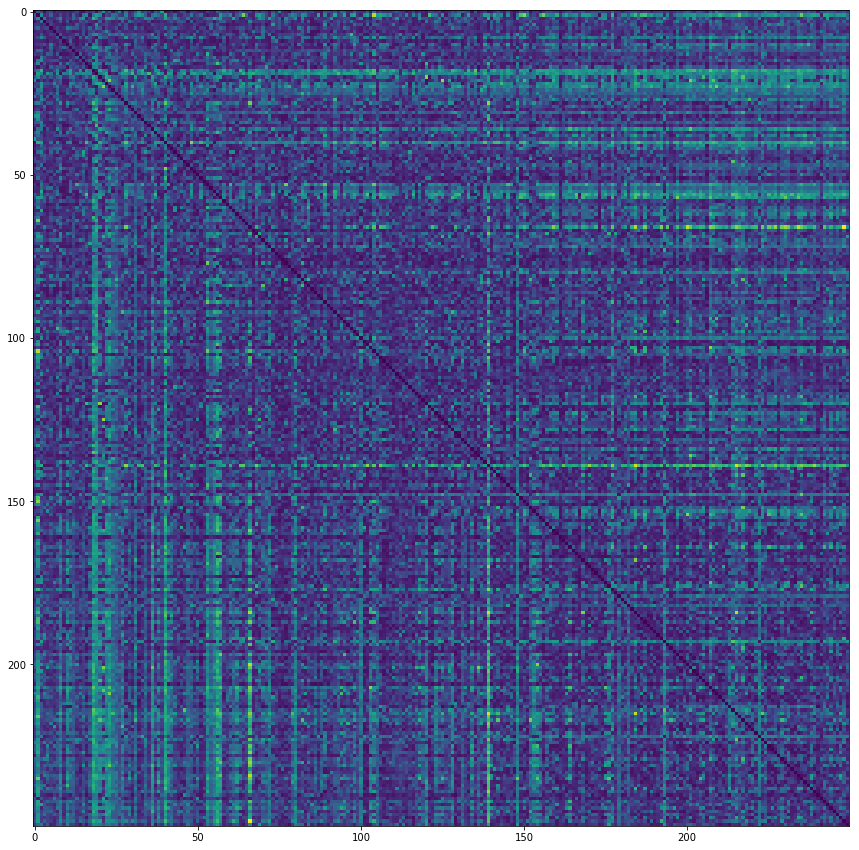

In [5]:
plt.figure(figsize=(15, 15))

dsym = dists + np.transpose(dists)
plt.imshow(dsym)

In [6]:
nenvs = len(envs)
ntrials = 10
nreps = 5
nholes = 5

e1e2means = np.zeros((nenvs, nenvs))
for env1 in range(nenvs):
    for env2 in range(nenvs):
        
        env1env2mean = np.mean(dsym[env1*ntrials:(env1*ntrials + ntrials), env2*ntrials:(env2*ntrials + ntrials)])
        e1e2means[env1, env2] = env1env2mean
        
hole_mat = np.zeros((nholes, nholes))
for b1 in range(nholes):
    for b2 in range(nholes):
        
        m = np.mean(e1e2means[b1*nreps:(b1*nreps+nreps), b2*nreps:(b2*nreps+nreps)])
        hole_mat[b1, b2] = m

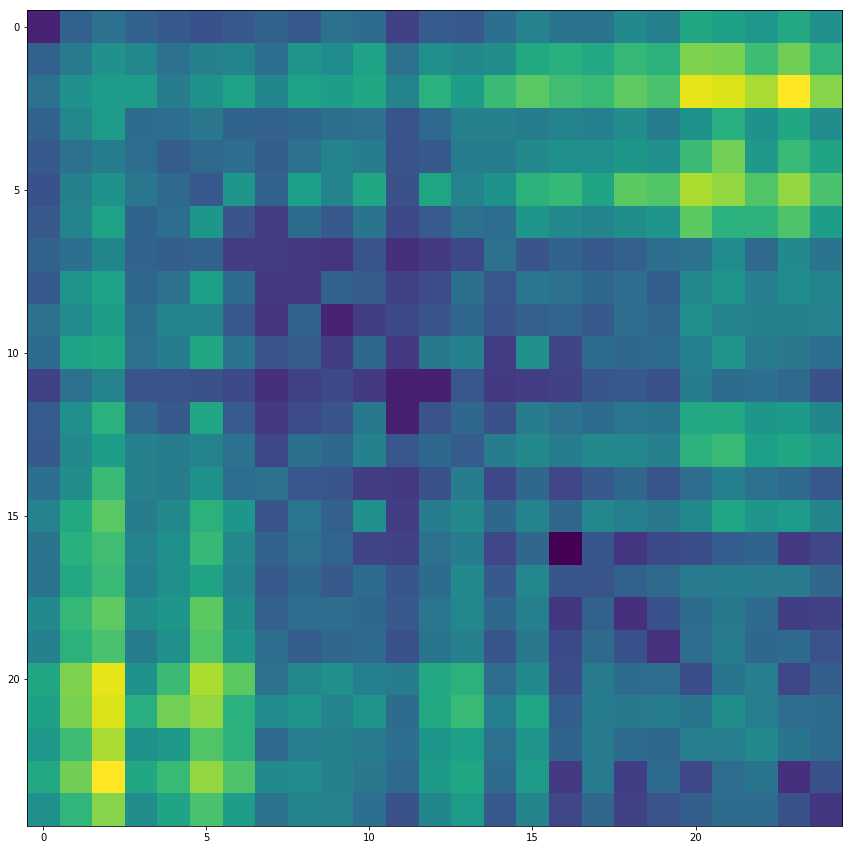

In [7]:
plt.figure(figsize=(15, 15))
plt.imshow(e1e2means)

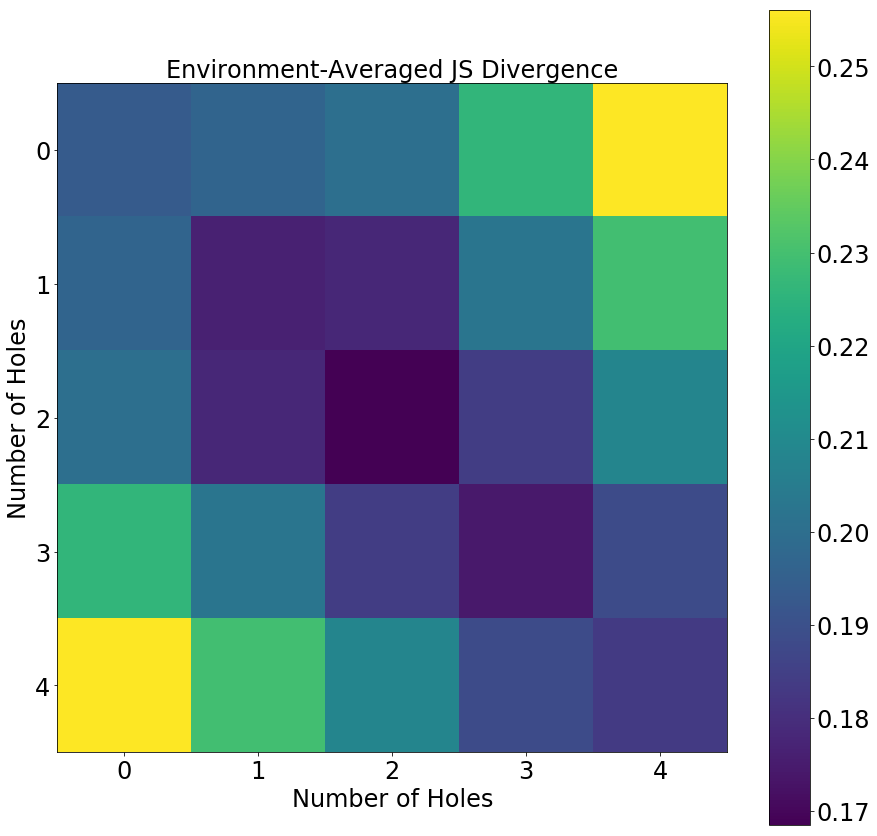

In [8]:
plt.figure(figsize=(15, 15))
plt.imshow(hole_mat)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=24)
#cbar.set_label('JS Divergence')

plt.xlabel('Number of Holes')
plt.ylabel('Number of Holes')
plt.title('Environment-Averaged JS Divergence', size=24)
ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(24)
plt.savefig('/home/brad/placecellsim/envavgedJS-2.pdf')